In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# **Exercice 1 :**

## 1. Définir la variable floue « Distance_to_next_car » sur l’univers de discours [0, 30]

In [29]:
Distance_to_next_car  = ctrl.Antecedent(np.arange(0, 30, 1), 'Distance_to_next_car') 

## 2. Création des cinq ensembles flous
### \+
## 3. modélisation des ensembles flous

In [30]:

Distance_to_next_car['v_small'] = fuzz.trimf(Distance_to_next_car.universe, [0, 0, 5])
Distance_to_next_car['small']   = fuzz.trapmf(Distance_to_next_car.universe, [0, 4, 8, 12])
Distance_to_next_car['perfect'] = fuzz.trapmf(Distance_to_next_car.universe, [8, 12, 18, 22])
Distance_to_next_car['big']     = fuzz.trapmf(Distance_to_next_car.universe, [18, 22, 26, 29])
Distance_to_next_car['v_big']   = fuzz.trimf(Distance_to_next_car.universe, [24, 29, 29])



## 4. Visualisation des fonctions d’appartenance 

c:\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


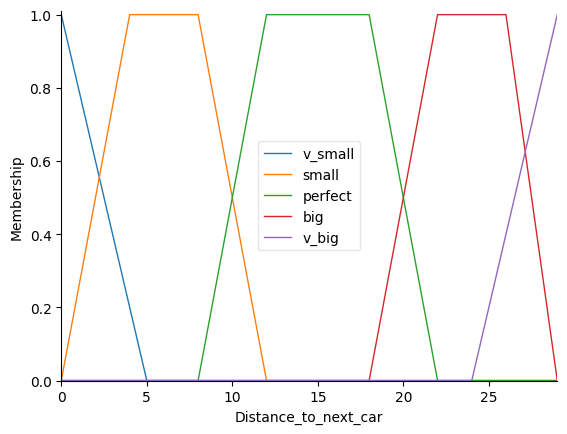

In [31]:
Distance_to_next_car.view()

# **Exercice 2 :**

## 1. Définir la variable floue Speed_change sur l’univers de discours [ -20, 20].

In [32]:

Speed_change = ctrl.Antecedent(np.arange(-20, 20, 1), 'Speed_change') 

## 2. Création des trois ensembles flous
### \+
## 3. modélisation des ensembles flous

In [33]:
Speed_change['declining'] = fuzz.trimf(Speed_change.universe, [-20, -20, 0])
Speed_change['constant']  = fuzz.trimf(Speed_change.universe, [-6, 0, 6])
Speed_change['growing']   = fuzz.trimf(Speed_change.universe, [0, 20, 20])


## 4. Tracer les fonctions d’appartenance de la variable Speed_change

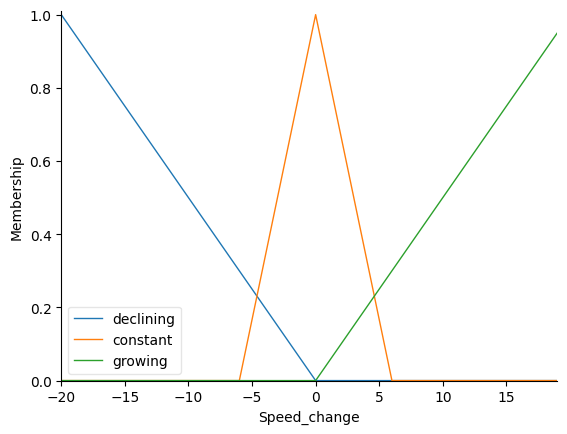

In [34]:
Speed_change.view()

# **Exercice 3 :**

## 1. Définir la variable de sortie Acceleration_Adjust sur l’univers de discours [ -3, 3].

In [35]:

Acceleration_Adjust = ctrl.Consequent(np.arange(-3, 3, 0.5), 'Acceleration_Adjust') 

## 2. Création des cinq ensembles flous
### \+
## 3. modélisation des ensembles flous

In [36]:
Acceleration_Adjust['neg_big'] = fuzz.trimf(Acceleration_Adjust.universe, [-3, -3, -1.5])
Acceleration_Adjust['neg_small'] = fuzz.trimf(Acceleration_Adjust.universe, [-2.5, -1.5, -0.5])
Acceleration_Adjust['zero'] = fuzz.trimf(Acceleration_Adjust.universe, [-1, 0, 1])
Acceleration_Adjust['pos_small'] = fuzz.trimf(Acceleration_Adjust.universe, [0.5, 1.5, 2.5])
Acceleration_Adjust['pos_big'] = fuzz.trimf(Acceleration_Adjust.universe, [1.5, 3, 3])

## 4. Tracer les fonctions d’appartenance de la variable Speed_change

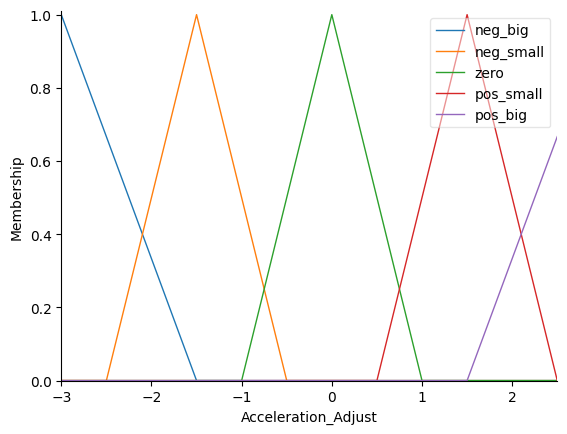

In [37]:
Acceleration_Adjust.view()

# **Exercice 4 :**

In [38]:
# Rule 1: v_small distance + declining speed -> neg_small acceleration
rule1 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small'])

# Rule 2: v_small distance + constant speed -> neg_big acceleration
rule2 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'], Acceleration_Adjust['neg_big'])

# Rule 3: v_small distance + growing speed -> neg_big acceleration
rule3 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'], Acceleration_Adjust['neg_big'])

# Rule 4: small distance + declining speed -> zero acceleration
rule4 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['declining'], Acceleration_Adjust['zero'])

# Rule 5: small distance + constant speed -> neg_small acceleration
rule5 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['constant'], Acceleration_Adjust['neg_small'])

# Rule 6: small distance + growing speed -> neg_big acceleration
rule6 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['growing'], Acceleration_Adjust['neg_big'])

# Rule 7: perfect distance + declining speed -> pos_small acceleration
rule7 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small'])

# Rule 8: perfect distance + constant speed -> zero acceleration
rule8 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'], Acceleration_Adjust['zero'])

# Rule 9: perfect distance + growing speed -> neg_small acceleration
rule9 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'], Acceleration_Adjust['neg_small'])

# Rule 10: big distance + declining speed -> pos_big acceleration
rule10 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['declining'], Acceleration_Adjust['pos_big'])

# Rule 11: big distance + constant speed -> pos_small acceleration
rule11 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['constant'], Acceleration_Adjust['pos_small'])

# Rule 12: big distance + growing speed -> zero acceleration
rule12 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['growing'], Acceleration_Adjust['zero'])

# Rule 13: v_big distance + declining speed -> pos_big acceleration
rule13 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['declining'], Acceleration_Adjust['pos_big'])

# Rule 14: v_big distance + constant speed -> pos_big acceleration
rule14 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['constant'], Acceleration_Adjust['pos_big'])

# Rule 15: v_big distance + growing speed -> pos_small acceleration
rule15 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['growing'], Acceleration_Adjust['pos_small'])


Acceleration_Adjust_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
Acceleration_Adjust_simulator= ctrl.ControlSystemSimulation(Acceleration_Adjust_ctrl)


## 2. simulation pour: <br>$\text{Distance\_to\_next\_car} = 13 \\et\\ \text{Speed\_change} = -2.5$

In [39]:
Acceleration_Adjust_simulator.input['Distance_to_next_car'] = 13
Acceleration_Adjust_simulator.input['Speed_change'] = -2.5

Acceleration_Adjust_simulator.compute()
print(Acceleration_Adjust_simulator.output['Acceleration_Adjust'])


0.3199831365935919


## 3. visualisation

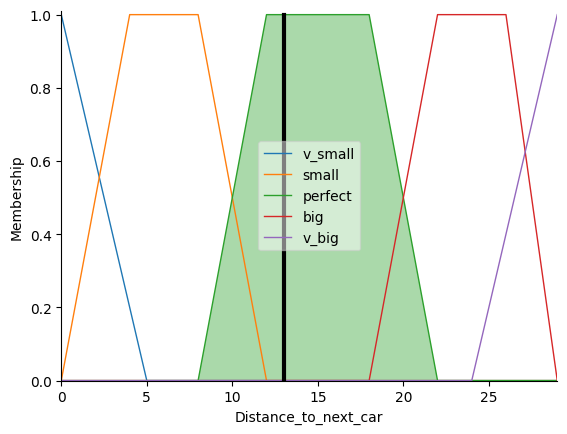

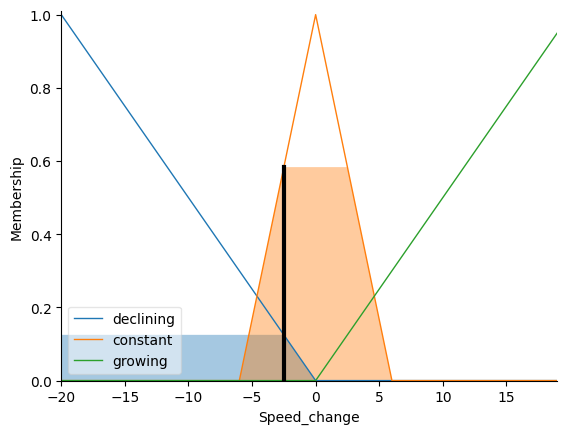

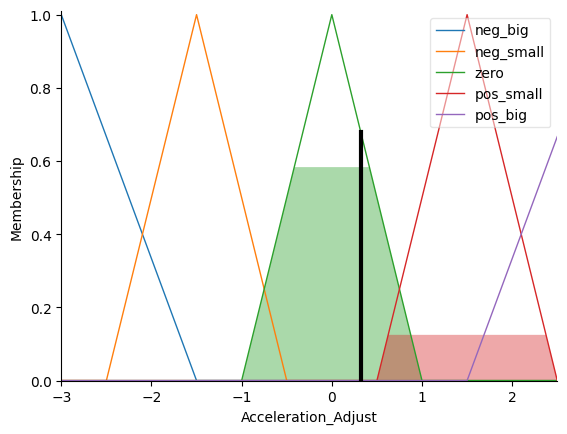

In [40]:
#En ajoutant sim=.., on indique que le graphique doit montrer la valeur d’entrée actuelle et l’effet sur la sortie.
Distance_to_next_car.view(sim=Acceleration_Adjust_simulator)
Speed_change.view(sim=Acceleration_Adjust_simulator)
Acceleration_Adjust.view(sim=Acceleration_Adjust_simulator)